This tutorial combines material from the [SoftwareCarpentary Python tutorial](http://swcarpentry.github.io/python-novice-gapminder/), and...

# matplotlib
matplotlib is a very popular Python library for creating plots. One of the original motivations behind matplotlib was to recreate the types of plotting functions avilable in MATLAB, hence the name. 

## matplotlib basics

In [1]:
# Import MatPlotlib
%matplotlib inline
import matplotlib.pyplot as plt

Let's make a simple set of data and plot a line graph.

Text(0, 0.5, 'Position (km)')

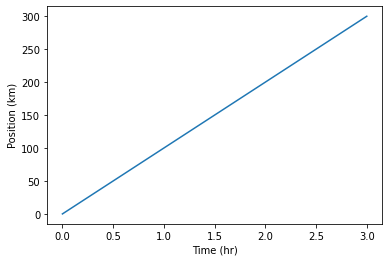

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')


In our CoLab notebook session, the plots will appear automatically once we execute each code cell. However, in a Python script or command-line session, we need to tell Python to display the plot with the following code:
`plt.show()`

## Plotting data from a Pandas DataFrame
Let's grab the Stockholm temperature data again, but this time load it as a Pandas DataFrame

In [3]:
!wget https://raw.githubusercontent.com/shaunmahony/BMMB554-2022/main/data/city-populations-reformat.csv

--2022-01-17 02:24:03--  https://raw.githubusercontent.com/shaunmahony/BMMB554-2022/main/data/city-populations-reformat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3809 (3.7K) [text/plain]
Saving to: ‘city-populations-reformat.csv’

city-populations-re 100%[===================>]   3.72K  --.-KB/s    in 0s      

2022-01-17 02:24:04 (70.4 MB/s) - ‘city-populations-reformat.csv’ saved [3809/3809]



In [4]:
!head city-populations-reformat.csv

Year,Bangalore,Beijing,Bogota,Buenos Aires,Cairo,Chongqing,Delhi,Dhaka,Guangzhou,Istanbul,Jakarta,Karachi,Kinshasa,Kolkata,Lagos,Lahore,Los Angeles,Manila,Mexico City,Moscow,Mumbai,New York,Osaka,Paris,Rio de Janeiro,Sao Paulo,Shanghai,Shenzhen,Tianjin,Tokyo
1950,745999,1671365,630315,5166140,2493514,1566966,1369369,335760,1048975,967497,1452000,1055380,201905,4604143,325218,835769,4045514,1543666,3365081,5356392,3088811,12338471,7005284,6283018,3026195,2334038,4288091,3148,2467096,11274641
1955,939396,2364625,894187,5910271,3029198,1913248,1781624,408866,1155063,1248709,1972106,1419491,292398,5219086,468460,1021679,5154301,1871605,4293878,5748746,3726210,13219362,8622976,6796437,3687344,3043828,5712858,5112,2760676,13712679
1960,1165978,3900441,1268645,6761837,3680160,2275158,2282962,507921,1271914,1453353,2678740,1853325,442853,5910210,762418,1264277,6529638,2273734,5479184,6169961,4414904,14163521,10614841,7410735,4493182,3969759,6865312,8302,2935185,16678821
1965,1377314,4582017,17

In [5]:
import numpy as np
import pandas as pd

cities = pd.read_csv('city-populations-reformat.csv')

cities.head()

,Year,Bangalore,Beijing,Bogota,Buenos Aires,Cairo,Chongqing,Delhi,Dhaka,Guangzhou,Istanbul,Jakarta,Karachi,Kinshasa,Kolkata,Lagos,Lahore,Los Angeles,Manila,Mexico City,Moscow,Mumbai,New York,Osaka,Paris,Rio de Janeiro,Sao Paulo,Shanghai,Shenzhen,Tianjin,Tokyo
0,1950,745999,1671365,630315,5166140,2493514,1566966,1369369,335760,1048975,967497,1452000,1055380,201905,4604143,325218,835769,4045514,1543666,3365081,5356392,3088811,12338471,7005284,6283018,3026195,2334038,4288091,3148,2467096,11274641
1,1955,939396,2364625,894187,5910271,3029198,1913248,1781624,408866,1155063,1248709,1972106,1419491,292398,5219086,468460,1021679,5154301,1871605,4293878,5748746,3726210,13219362,8622976,6796437,3687344,3043828,5712858,5112,2760676,13712679
2,1960,1165978,3900441,1268645,6761837,3680160,2275158,2282962,507921,1271914,1453353,2678740,1853325,442853,5910210,762418,1264277,6529638,2273734,5479184,6169961,4414904,14163521,10614841,7410735,4493182,3969759,6865312,8302,2935185,16678821
3,1965,1377314,4582017,1779758,7548511,4737968,2188064,2845042,820740,1400511,2001192,3296964,2405037,717018,6589384,1135439,1574981,7407634,2828883,6969157,6621780,5314300,15176758,13065322,7855185,5522674,5494150,6428131,13480,3120620,20284371
4,1970,1614756,4426045,2383425,8416170,5584507,2237344,3530693,1373718,1542151,2772095,3915406,3118723,1069714,7329372,1413528,1963951,8377685,3534309,8830947,7106457,6412876,16191180,15271510,8208121,6790519,7620490,6052468,21890,3317826,23297503


Let's plot the New York column. 

Text(0, 0.5, 'Population')

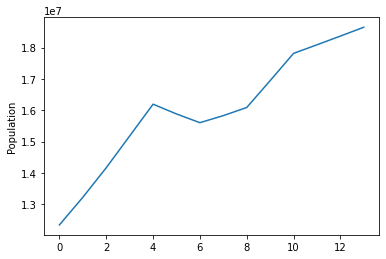

In [6]:
cities['New York'].plot()
plt.ylabel('Population')

Why isn't the x-axis showing the years? It's actually showing the index, which by default is set to 0,1,.. etc. 

In [7]:
cities.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Instead, let's set it to the Year column and otherwise delete that column from the the DataFrame" `cities.set_index('Year',drop=True,inplace=True)`

Note that we could alternatively have just plotted the New York column against the Year column: `cities['New York'].plot(x='Year')`

Or, when we loaded the data, we could have defined the first column to be the index: `cities = pd.read_csv('city-populations-reformat.csv', index_col=0)`

In [8]:
# Let's set index to be the Year column
cities.set_index('Year',drop=True,inplace=True)


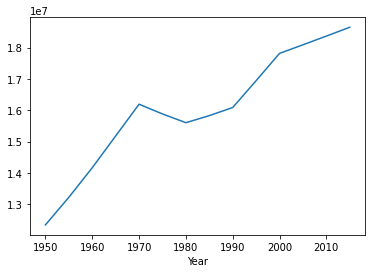

In [9]:
cities['New York'].plot()

Plotting multiple cities at once:

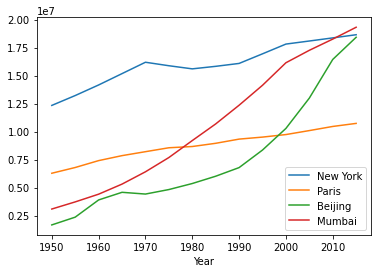

In [10]:
cities[['New York','Paris','Beijing','Mumbai']].plot()

## Plot styles/types
There are lots of other plot styles and types available. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for the DataFrame plot method. 



Text(0, 0.5, 'Population')

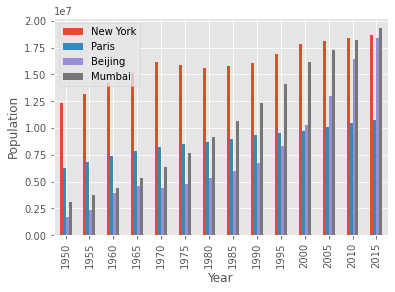

In [11]:
plt.style.use('ggplot')
cities[['New York','Paris','Beijing','Mumbai']].plot(kind='bar')
plt.ylabel('Population')

You can also create plots by calling the `matplotlib plot` function directly. 

Text(0.5, 0, 'Years')

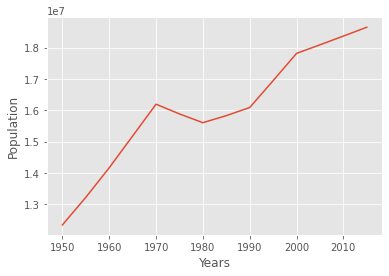

In [12]:
years = cities.index.values
newyork = cities['New York']

plt.plot(years, newyork)
plt.ylabel('Population')
plt.xlabel('Years')

We can add multiple elements onto the same plot.

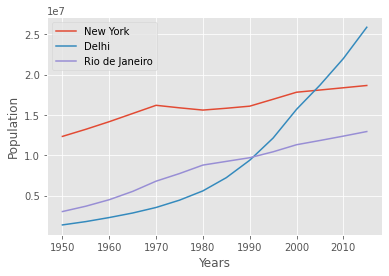

In [13]:
years = cities.index.values
newyork = cities['New York']
delhi = cities['Delhi']
rio = cities['Rio de Janeiro']

plt.plot(years, newyork, label='New York')
plt.plot(years, delhi, label='Delhi')
plt.plot(years, rio, label='Rio de Janeiro')
plt.ylabel('Population')
plt.xlabel('Years')
plt.legend()
plt.show()

Let's plot New York versus Rio as a scatter.

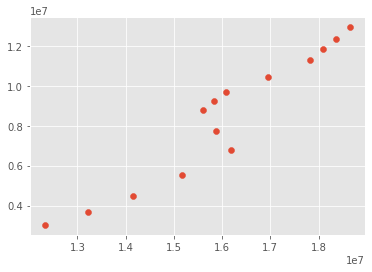

In [14]:
plt.scatter(newyork, rio)
plt.show()

## Saving plots

Once you are happy with the format and style of the plot, you will likely want to save it as a file. You can do so with the `savefig` method. 

`plt.savefig('my_figure.png')`

This will save the current figure to the file my_figure.png. The file format will determined from the file name extension (other formats are pdf, ps, eps and svg).

The `savefig` method operates on the current `figure`. Once the plot has been displayed to the screen, matplotlib starts a new empty figure. Thus, you will need to call `savefig` before the plot has been displayed. 

When plotting from DataFrames, there is an added complication that the plot is made and displayed in a single line, so you can't call `savefig` before displaying the figure. In this case, you can save a reference to the current figure in a local variable (with `plt.get_figure()`) and then call the `savefig` method from that variable.

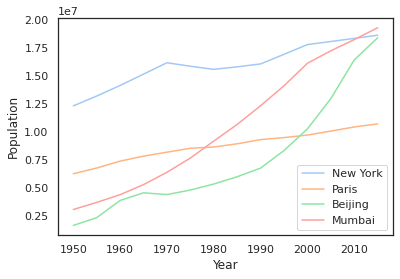

In [22]:
plot = cities[['New York','Paris','Beijing','Mumbai']].plot()
plt.ylabel('Population')
fig = plot.get_figure()
fig.savefig('my_figure.png')

# Seaborn

seaborn is a plotting library that is built on top of matplotlib. It complements matplotlib to make aesthetically pleasing statistical plots. The creator of seaborn, Michael Waksom, puts the goal of seaborn as follows:

> If Matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too”




## Basic plots in seaborn

In [16]:
# Import Seaborn for plotting and styling
import seaborn as sns

Okay, so let's see how to create our city population line plot looks like in seaborn. Note that seaborn is naturally compatible with Pandas DataFrames.

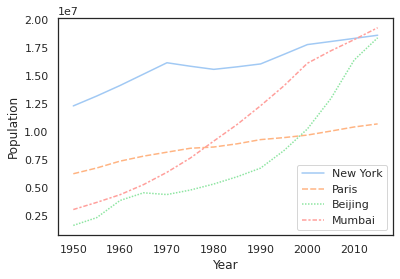

In [23]:
sns.lineplot(data=cities[['New York','Paris','Beijing','Mumbai']])
plt.ylabel('Population')
plt.show()

Not very different from the basic matplotlib style here. Let's change style and color palette. More info:
https://seaborn.pydata.org/tutorial/aesthetics.html 

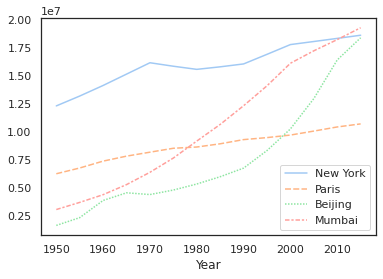

In [20]:
sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=cities[['New York','Paris','Beijing','Mumbai']])
plt.ylabel('Population')
plt.show()

Great, but I want to show this plot in a talk, and I'm afraid the text elements are too small to be legible on the screen. Seaborn provides a method called set_context(), where you can easily scale the various elements using four preset 'contexts':

*   paper
*   notebook (default)
*   talk
*   poster



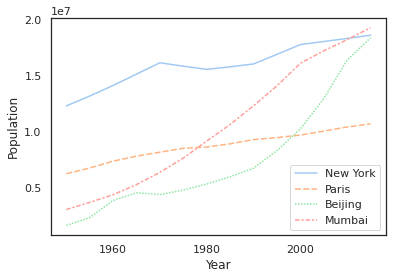

In [26]:
sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=cities[['New York','Paris','Beijing','Mumbai']])
plt.ylabel('Population')
sns.set_context('talk')
plt.show()

## Combining plots on tidy data

Let's say we want to take another view of our population data. Instead of tracking individual cities, we want to look at the distribution of populations of these 30 cities over time. One type of plot that might be suitable here is a violin plot. Let's try it in seaborn. 

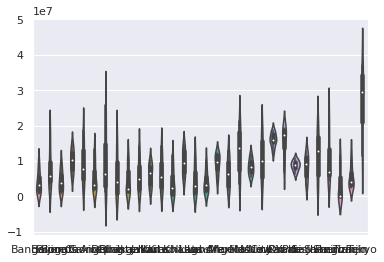

In [39]:
#Reset our theme
sns.set_theme()

sns.violinplot(data=cities)


Well... this is a mess! But we can (maybe) make out that seaborn is doing the opposite of what we want to see. Instead of plotting the distribution of city populations in each year, it's plotting the distribution of populations from the various years over each city. What we need to do is reshape our DataFrame. Let's melt the data into its long form,

In [36]:
# Melt the DataFrame to convert to long form
cities_m = cities.reset_index().melt('Year', var_name='City', value_name='Population')
cities_m.head()

,Year,City,Population
0,1950,Bangalore,745999
1,1955,Bangalore,939396
2,1960,Bangalore,1165978
3,1965,Bangalore,1377314
4,1970,Bangalore,1614756


Now let's plot Populations over Years in a violin plot. 

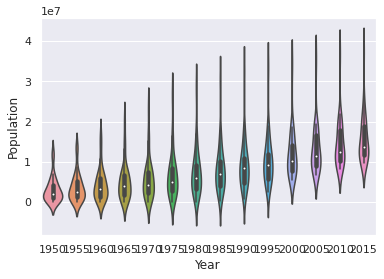

In [40]:
sns.violinplot(data=cities_m, x='Year', y='Population')
plt.show()

This is more like what we wanted, but it's a bit crowded. Let's make it bigger. 

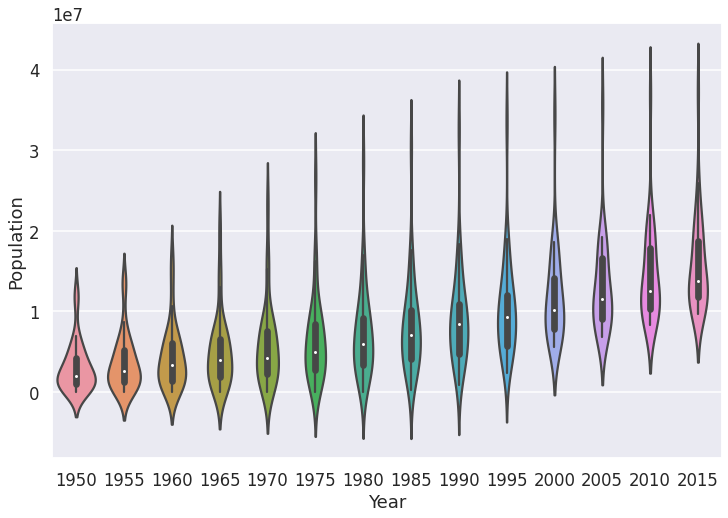

In [43]:
plt.figure(figsize=(12,8))
sns.violinplot(data=cities_m, x='Year', y='Population')
sns.set_context('talk')
plt.show()

Another plot style that would show the same information, but using the individual data points, is a swwarmplot. 

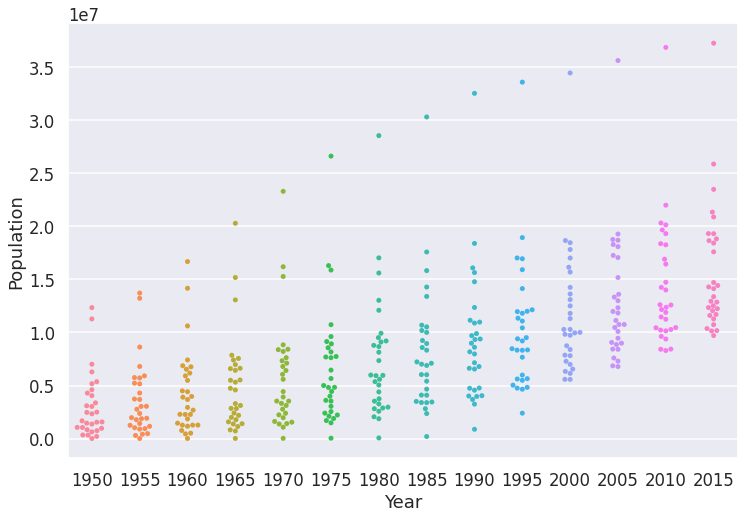

In [44]:
plt.figure(figsize=(12,8))
sns.swarmplot(data=cities_m, x='Year', y='Population')
sns.set_context('talk')
plt.show()

Could we show both a violinplot and a swarmplot together? Yes!

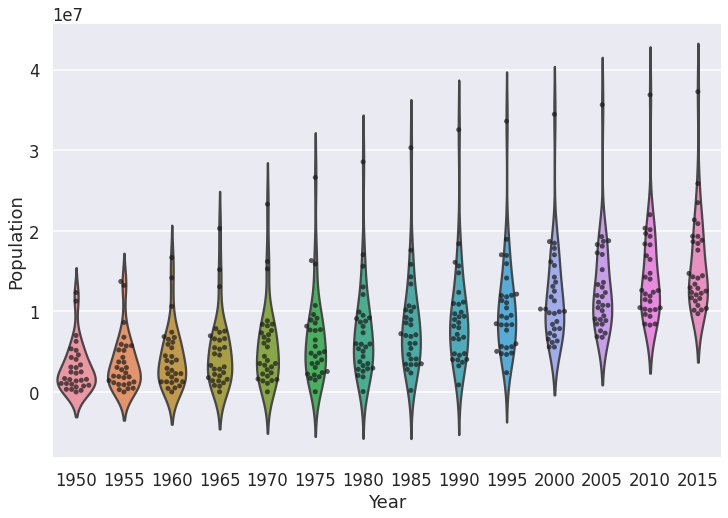

In [46]:
plt.figure(figsize=(12,8))

sns.violinplot(
    data=cities_m, 
    x='Year', 
    y='Population',
    inner=None) # Remove the bars inside the violins

sns.swarmplot(
    data=cities_m, 
    x='Year', 
    y='Population',
    color='k', # Make points black
    alpha=0.7) # and slightly transparent

sns.set_context('talk')
plt.show()

## Heatmaps
Heatmaps are a very popular and useful type of plot in genomics. They may not be particularly useful for displaying our city population data, but let's stick with the theme for now. Let's see what a default heatmap would display on our wide format data. 

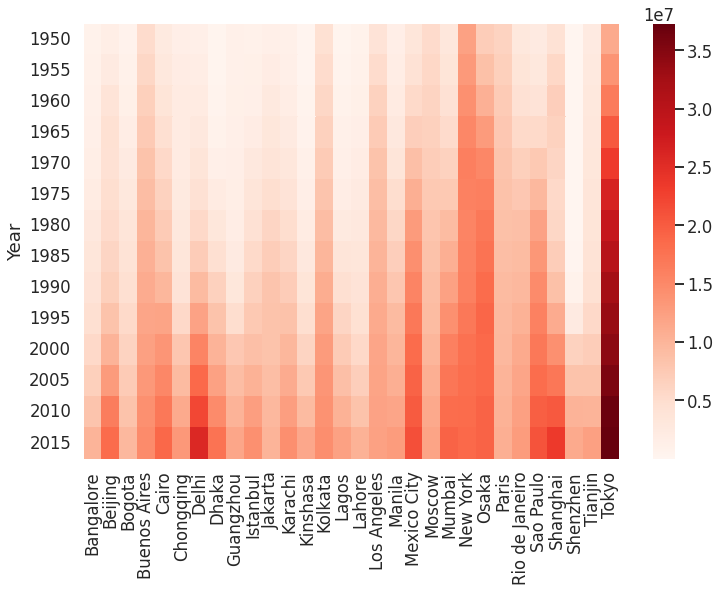

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(data=cities, 
            cmap=sns.color_palette("Reds", as_cmap=True)) #Sets a new color palette
plt.show()

What if we want to automatically cluster cities with similar population trends? Seaborn has a related heatmap function called `clustermap()` that enables hierarchical clustering on rows, columns, or both. 

<Figure size 1008x576 with 0 Axes>

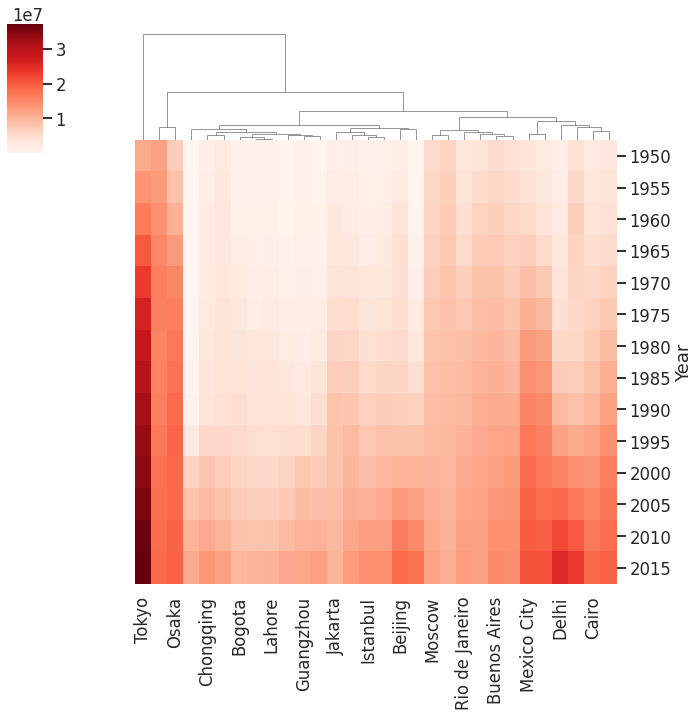

In [63]:
plt.figure(figsize=(14,8))
sns.clustermap(data=cities, 
               col_cluster=True, 
               row_cluster=False,
               cmap=sns.color_palette("Reds", as_cmap=True))
plt.show()